In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data
data_for_lstm = pd.read_csv("modeling_data_2.csv")
data_for_lstm = data_for_lstm.drop(columns=['Date'])

# Define target variable - using Wholesale
target = data_for_lstm['Retail']

# Define features - excluding target variable
features = data_for_lstm.drop(columns=['Wholesale', 'Retail'])

# Split into train, validation, and test sets (80/10/10 split)
train_size = int(len(features) * 0.8)
val_size = int(len(features) * 0.1)
train_X, train_y = features[:train_size], target[:train_size]
val_X, val_y = features[train_size:train_size + val_size], target[train_size:train_size + val_size]
test_X, test_y = features[train_size + val_size:], target[train_size + val_size:]

# Initialize the scaler
scaler_features = StandardScaler()
scaler_target = StandardScaler()

# Fit and transform the scaler on the training data
train_X_scaled = scaler_features.fit_transform(train_X)
train_y_scaled = scaler_target.fit_transform(train_y.values.reshape(-1, 1))

# Only transform the validation and test data
val_X_scaled = scaler_features.transform(val_X)
val_y_scaled = scaler_target.transform(val_y.values.reshape(-1, 1))
test_X_scaled = scaler_features.transform(test_X)
test_y_scaled = scaler_target.transform(test_y.values.reshape(-1, 1))


print(f"Train X shape: {train_X_scaled.shape}, Train y shape: {train_y_scaled.shape}")
print(f"Validation X shape: {val_X_scaled.shape}, Validation y shape: {val_y_scaled.shape}")
print(f"Test X shape: {test_X_scaled.shape}, Test y shape: {test_y_scaled.shape}")


Train X shape: (16344, 10), Train y shape: (16344, 1)
Validation X shape: (2043, 10), Validation y shape: (2043, 1)
Test X shape: (2044, 10), Test y shape: (2044, 1)


In [4]:
train_X.columns

Index(['Year', 'Year_sin', 'Year_cos', 'Wholesale_lag_7', 'Retail_lag_7',
       'Wholesale_rolling_mean_7d', 'Retail_rolling_mean_7d',
       'Wholesale_rolling_std_7d', 'Retail_rolling_std_7d', 'County_2'],
      dtype='object')

In [5]:
import joblib

# Save the scalers
scaler_features_path = "models/scaler_retail_features.pkl"
scaler_target_path = "models/scaler_retail_target.pkl"

# Save the feature and target scalers
joblib.dump(scaler_features, scaler_features_path)
joblib.dump(scaler_target, scaler_target_path)

print(f"Feature scaler saved to {scaler_features_path}")
print(f"Target scaler saved to {scaler_target_path}")

Feature scaler saved to models/scaler_retail_features.pkl
Target scaler saved to models/scaler_retail_target.pkl


In [6]:
n_timesteps = 20  # 20-day window
n_features = train_X.shape[1]  # Number of features in the dataset

# Reshape data into 3D arrays for LSTM
def reshape_for_multistep_lstm(X, y, n_timesteps, forecast_horizon):
    X_lstm, y_lstm = [], []
    for i in range(n_timesteps, len(X) - forecast_horizon + 1):
        X_lstm.append(X[i - n_timesteps:i])
        y_lstm.append(y[i:i + forecast_horizon])
    return np.array(X_lstm), np.array(y_lstm)

# For 20-day prediction
forecast_horizon = 20
train_X_lstm, train_y_lstm = reshape_for_multistep_lstm(train_X_scaled, train_y_scaled, n_timesteps, forecast_horizon)
val_X_lstm, val_y_lstm = reshape_for_multistep_lstm(val_X_scaled, val_y_scaled, n_timesteps, forecast_horizon)
test_X_lstm, test_y_lstm = reshape_for_multistep_lstm(test_X_scaled, test_y_scaled, n_timesteps, forecast_horizon)


print(f"Train X shape: {train_X_lstm.shape}, Train y shape: {train_y_lstm.shape}")
print(f"Validation X shape: {val_X_lstm.shape}, Validation y shape: {val_y_lstm.shape}")
print(f"Test X shape: {test_X_lstm.shape}, Test y shape: {test_y_lstm.shape}")

Train X shape: (16305, 20, 10), Train y shape: (16305, 20, 1)
Validation X shape: (2004, 20, 10), Validation y shape: (2004, 20, 1)
Test X shape: (2005, 20, 10), Test y shape: (2005, 20, 1)


Epoch 1/50

Epoch 1: val_loss improved from inf to 2.02185, saving model to models\best_retail_model_sequence.h5
510/510 - 20s - loss: 1.3981 - val_loss: 2.0219 - lr: 5.0000e-05 - 20s/epoch - 39ms/step
Epoch 2/50


c:\Users\Hp\anaconda3\envs\env_2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.02185 to 1.93101, saving model to models\best_retail_model_sequence.h5
510/510 - 10s - loss: 1.2952 - val_loss: 1.9310 - lr: 5.0000e-05 - 10s/epoch - 20ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.93101 to 1.83289, saving model to models\best_retail_model_sequence.h5
510/510 - 9s - loss: 1.2105 - val_loss: 1.8329 - lr: 5.0000e-05 - 9s/epoch - 18ms/step
Epoch 4/50

Epoch 4: val_loss improved from 1.83289 to 1.70748, saving model to models\best_retail_model_sequence.h5
510/510 - 9s - loss: 1.1196 - val_loss: 1.7075 - lr: 5.0000e-05 - 9s/epoch - 18ms/step
Epoch 5/50

Epoch 5: val_loss improved from 1.70748 to 1.60860, saving model to models\best_retail_model_sequence.h5
510/510 - 9s - loss: 1.0413 - val_loss: 1.6086 - lr: 5.0000e-05 - 9s/epoch - 18ms/step
Epoch 6/50

Epoch 6: val_loss improved from 1.60860 to 1.54892, saving model to models\best_retail_model_sequence.h5
510/510 - 9s - loss: 0.9897 - val_loss: 1.5489 - lr: 5.0000e-05 - 9s/epoch -

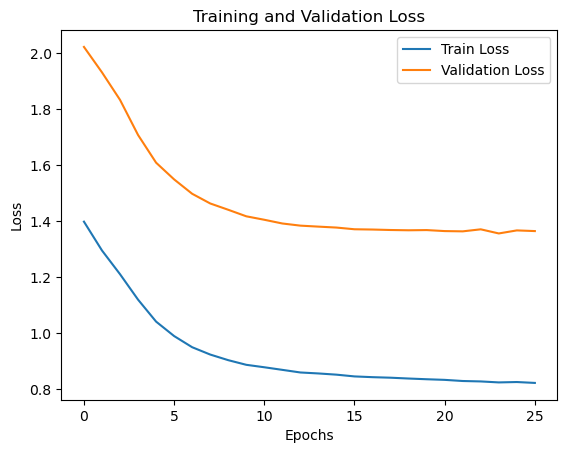

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Build the LSTM model
def build_lstm_model(n_timesteps, n_features, forecast_horizon):
    model = Sequential()
    
    # First LSTM layer with reduced units and L2 regularization
    model.add(LSTM(16, activation='tanh', return_sequences=True, 
                   kernel_regularizer=l2(0.01), input_shape=(n_timesteps, n_features)))
    model.add(Dropout(0.4))  # Dropout to prevent overfitting
    
    # Second LSTM layer with reduced units
    model.add(LSTM(16, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    
    # Dense layer before output
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))  # Dropout on dense layer
    
    # Output layer
    model.add(Dense(forecast_horizon))
    model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')  # Reduced learning rate
    return model

# Define the model
model = build_lstm_model(n_timesteps, n_features, forecast_horizon)

# Training parameters
epochs = 50  # Maximum number of epochs
batch_size = 32  # Batch size for gradient updates

# Early stopping configuration
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=2,  # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best weights after stopping
)

# Model checkpoint to save the best model based on validation loss
checkpoint = ModelCheckpoint('models/best_retail_model_sequence.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

# Train the model with callbacks
history = model.fit(
    train_X_lstm, train_y_lstm,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_X_lstm, val_y_lstm),
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=2
)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Make predictions on the validation set
predictions = model.predict(val_X_lstm)

# Reshape the predictions to be 2D (samples, forecast_horizon)
predictions_reshaped = predictions.reshape(predictions.shape[0], forecast_horizon)

# Reshape the true values (val_y_lstm) to be 2D as well
val_y_reshaped = val_y_lstm.reshape(val_y_lstm.shape[0], forecast_horizon)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(val_y_reshaped, predictions_reshaped))
print(f"Validation RMSE: {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(val_y_reshaped, predictions_reshaped)
print(f"Validation MAPE: {mape}%")

63/63 [==============================] - 2s 6ms/step
Validation RMSE: 1.1562942398965208
Validation MAPE: 1.1171312801502462%


In [9]:
# Test Set Evaluation


# Make predictions on the test set
test_predictions = model.predict(test_X_lstm)

# Reshape the predictions to be 2D (samples, forecast_horizon)
test_predictions_reshaped = test_predictions.reshape(test_predictions.shape[0], forecast_horizon)

# Reshape the true values (test_y_lstm) to be 2D as well
test_y_reshaped = test_y_lstm.reshape(test_y_lstm.shape[0], forecast_horizon)

# Calculate RMSE for the test set
test_rmse = np.sqrt(mean_squared_error(test_y_reshaped, test_predictions_reshaped))
print(f"Test RMSE: {test_rmse}")

# Calculate MAPE for the test set
test_mape = mean_absolute_percentage_error(test_y_reshaped, test_predictions_reshaped)
print(f"Test MAPE: {test_mape}%")

# Save the results
results = {
    "Validation RMSE": rmse,
    "Validation MAPE": mape,
    "Test RMSE": test_rmse,
    "Test MAPE": test_mape
}



63/63 [==============================] - 0s 6ms/step
Test RMSE: 0.7244387248476025
Test MAPE: 2.1514324617234566%


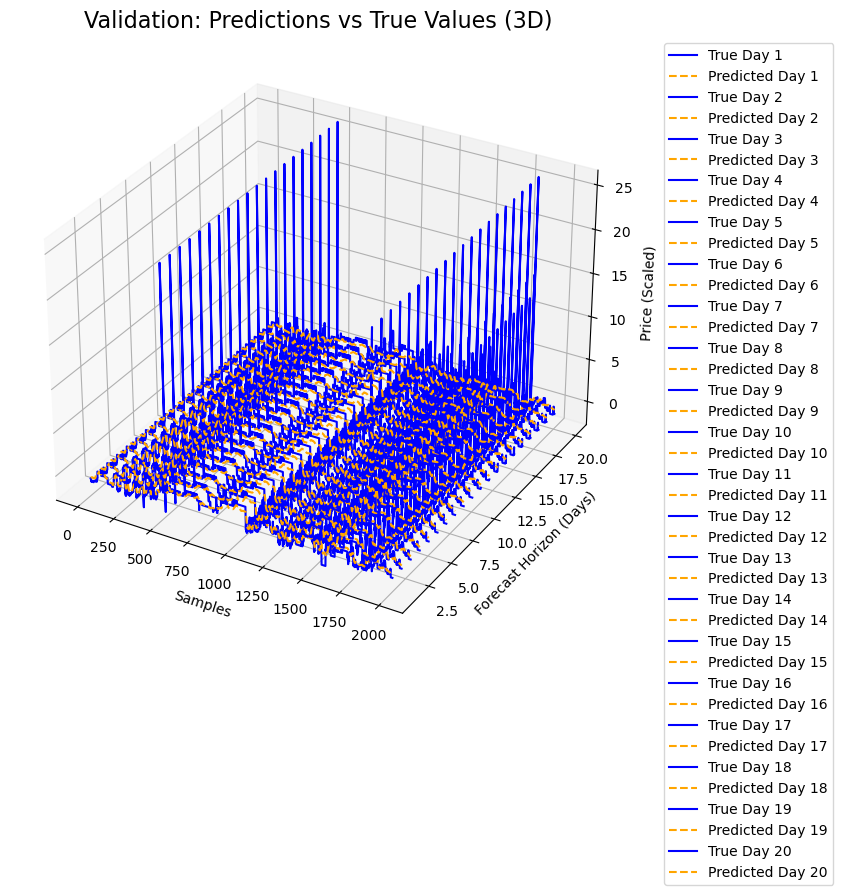

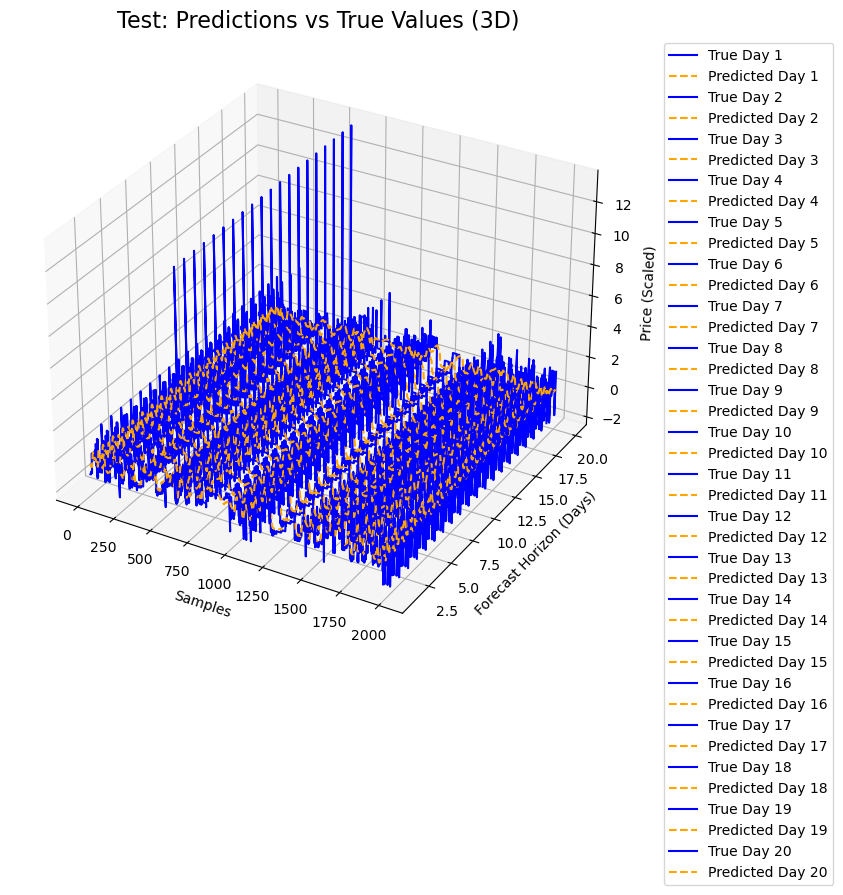

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a 3D plot
def plot_3d_predictions(true_values, predicted_values, forecast_horizon, title):
    samples = np.arange(true_values.shape[0])  # Sample indices

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title, fontsize=16)

    for i in range(forecast_horizon):
        # True values
        ax.plot(samples, [i + 1] * len(samples), true_values[:, i], label=f"True Day {i + 1}", color="blue")
        # Predicted values
        ax.plot(samples, [i + 1] * len(samples), predicted_values[:, i], label=f"Predicted Day {i + 1}", linestyle="--", color="orange")

    # Labels
    ax.set_xlabel("Samples")
    ax.set_ylabel("Forecast Horizon (Days)")
    ax.set_zlabel("Price (Scaled)")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# 3D plot for validation predictions
plot_3d_predictions(val_y_reshaped, predictions_reshaped, forecast_horizon, "Validation: Predictions vs True Values (3D)")

# 3D plot for test predictions
plot_3d_predictions(test_y_reshaped, test_predictions_reshaped, forecast_horizon, "Test: Predictions vs True Values (3D)")
